In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [2]:
train = pd.read_csv('./assets/data_train.csv')
test = pd.read_csv('./assets/data_test.csv')

In [3]:
X_train = train.iloc[:,0:14]
X_test = test.iloc[:,0:14]
y_train = train.iloc[:,14]
y_test = test.iloc[:,14]


X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

columns = X_train.columns

In [4]:
# Scaling data
# Random Forest Classifier
# BASELINE CLASSIFIER

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("\nAccuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nPrecision Value is\n",classification_report(y_test,y_pred))


Accuracy is  85.45543885510718 

Precision Value is
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     12435
           1       0.73      0.61      0.66      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.77      0.79     16281
weighted avg       0.85      0.85      0.85     16281



In [5]:
# Setting up parametergrid for tuning
# Doing RandomizedSearchCV to get best parameters

param_grid = { 
    'n_estimators': np.arange(0,1000,100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : np.arange(0,40,5),
    'criterion' :['gini', 'entropy']
}

CV_clf = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, cv= 5)
CV_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 0,  5, 10, 15, 20, 25, 30, 35]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])})

In [6]:
CV_clf.best_params_

{'n_estimators': 300,
 'max_features': 'log2',
 'max_depth': 15,
 'criterion': 'gini'}

In [7]:
# https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-3-cross-validation-and-hyperparameter-tuning/

results_clf = pd.DataFrame(CV_clf.cv_results_['params'])
results_clf['test_score'] = CV_clf.cv_results_['mean_test_score']
results_clf.columns

Index(['n_estimators', 'max_features', 'max_depth', 'criterion', 'test_score'], dtype='object')

Text(0.5, 1.0, 'clf Performance Comparison')

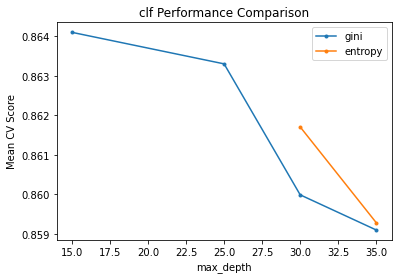

In [8]:
for i in ['gini','entropy']:
    temp = results_clf[results_clf['criterion'] == i]
    temp_avg = temp.groupby('max_depth').agg({'test_score':'mean'})
    plt.plot(temp_avg, marker = '.', label = i)
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('Mean CV Score')
plt.title('clf Performance Comparison')

Text(0.5, 1.0, 'clf Performance Comparison')

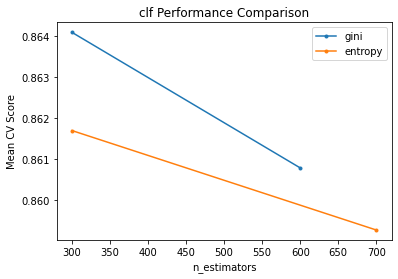

In [9]:
for i in ['gini','entropy']:
    temp = results_clf[results_clf['criterion'] == i]
    temp_avg = temp.groupby('n_estimators').agg({'test_score':'mean'})
    plt.plot(temp_avg, marker = '.', label = i)
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Mean CV Score')
plt.title('clf Performance Comparison')

In [10]:
clf1 = RandomForestClassifier(max_depth=15, max_features='log2', n_estimators = 300, criterion ='gini')
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)
print("\nAccuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nPrecision Value is\n",classification_report(y_test,y_pred))


Accuracy is  86.23548922056385 

Precision Value is
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     12435
           1       0.76      0.60      0.67      3846

    accuracy                           0.86     16281
   macro avg       0.82      0.77      0.79     16281
weighted avg       0.86      0.86      0.86     16281



<AxesSubplot:xlabel='feature'>

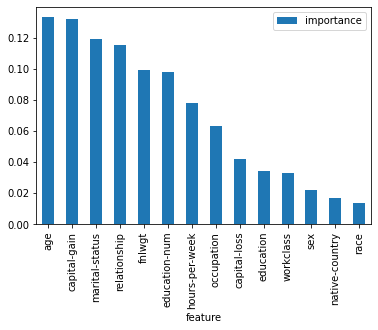

In [11]:
importances = pd.DataFrame({'feature':columns ,'importance':np.round(clf1.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

In [18]:
# Doing GridSearchCV 

param_grid = { 
    'n_estimators': np.arange(250,350,20),
    'max_features': ['log2'],
    'max_depth' : np.arange(10,20,2),
    'criterion' :['gini']
}

CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': array([10, 12, 14, 16, 18]),
                         'max_features': ['log2'],
                         'n_estimators': array([250, 270, 290, 310, 330])})

In [19]:
CV_clf.best_params_

{'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'log2',
 'n_estimators': 290}

In [20]:
clf2 = RandomForestClassifier(max_depth=18, max_features='log2', n_estimators =290 , criterion ='gini')
clf2.fit(X_train, y_train)

y_pred = clf2.predict(X_test)
print("\nAccuracy is ", accuracy_score(y_test,y_pred)*100,"\n\nPrecision Value is\n",classification_report(y_test,y_pred))


Accuracy is  86.21706283397825 

Precision Value is
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     12435
           1       0.77      0.60      0.67      3846

    accuracy                           0.86     16281
   macro avg       0.83      0.77      0.79     16281
weighted avg       0.86      0.86      0.86     16281



<AxesSubplot:xlabel='feature'>

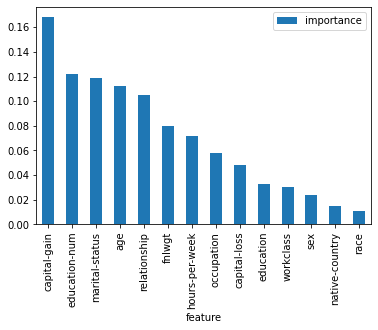

In [23]:
importances1 = pd.DataFrame({'feature': columns ,'importance':np.round(clf2.feature_importances_,3)})
importances1 = importances1.sort_values('importance',ascending=False).set_index('feature')
importances1.plot.bar()